# Исследование надежности заёмщиков


**Цель исследования**  

Нужно разобраться, как разные характеристика клиента влияют на факт погашения кредита в срок.    
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Заказчик**    

Кредитный отдел банка.

**Вопросы, на которые необходимо ответить:**    

* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**    

Входные данные от банка — статистика о платёжеспособности клиентов, файл `data.csv`.    
О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки.

Таким образом, исследование пройдёт в три этапа:

* Обзор данных.
* Предобработка данных.
* Ответы на вопросы.


## Шаг 1. Обзор данных

In [1]:
# импорт библиотек
import pandas as pd   
import seaborn as sns    
import matplotlib.pyplot as plt

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('data.csv')

In [3]:
df.head(10)    # выводим на просмотр первые 5 строк таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
df.info()    # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице двенадцать столбцов. Тип данных во всех столбцах — `object`, `float` и `int`.

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита;

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


In [5]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Выводы**

В каждой строке таблицы — данные о заёмщике. Предварительно можно утверждать, что информации достаточно для пответов на вопросы.

Но встречаются пропуски в данных, заменты артефакты (например, отрицательное количество дней стажа), возможны дубликаты, и, скорее всего, потребуется изменение формата в колонках для удобства.

Приступаем к предобработке данных.

## Шаг 2. Предобработка данных

Удалим дубликаты, исключим пропуски, приведем данные в столбцах к единому стилю, оптимизируем данные в таблице путем категоризации.

### Удаление дубликатов

Проверим датафрейм на наличие явных дубликатов и избавимся от них.

In [6]:
df.duplicated().sum()    # подсчёт явных дубликатов

54

In [7]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)

df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()    # проверка

0

Проведем работу с текстом в столбцах: для этого выведем каждый столбец и визуально оценим его значения на уникальность.     
Не исключено, что придется вносить изменения, если ошибки критичны и могут повлиять на результат исследования.

In [8]:
df['education'].value_counts()    # просмотр уникальных значений

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Предположу, что информация могла быть сведена из разных баз, где предполагаемые варианты для выбора (при заполнении анкеты) написаны в разных стилях.

Приведем все значения к нижнему регистру.

In [9]:
#приводим все символы в строке к нижнему регистру, проверяем результат

df['education'] = df['education'].str.lower()
df['education'].value_counts()    # проверка

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [10]:
df['family_status'].value_counts()    # просмотр уникальных значений

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Одно из значений начинается с заглавной буквы. Приведем все к единой стилистике.

In [11]:
df['family_status'] = df['family_status'].str.lower()    #приводим все символы в строке к нижнему регистру

In [12]:
df['income_type'].value_counts()     # просмотр уникальных значений

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [13]:
df['gender'].value_counts()     # просмотр уникальных значений

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

Интересно: в данных встречаются три разных половых принадлежности. Запомним этот момент и вернемся к нему позже.

In [14]:
df['purpose'].value_counts()     # просмотр уникальных значений

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

В общем и целом, к данным в столбцах (кроме последнего) -  замечаний нет.


### Категоризация целей кредита

Как мы заметили выше, данные столбца `purpose` нуждаются в категоризации: объективных причин для получения заёма всего четыре.

Это:
* `операции с автомобилем`,
* `операции с недвижимостью`,
* `проведение свадьбы`,
* `получение образования`.

Создадим новый столбец `purpose_category`, в который добавим категории, перечисленные выше.
Данные старого столбца`purpose` после этого уже не будут нужны, и могут быть удалены.

In [15]:
def purposes(reason):    # создаем функцию
    if 'образ' in reason:
        return 'получение образования'
    if 'свадь' in reason:
        return 'проведение свадьбы'
    if 'авто' in reason:
        return 'операции с автомобилем'
    return 'операции с недвижимостью'

In [16]:
df['purpose_category'] = df['purpose'].apply(purposes)    # применяем ее

In [17]:
df['purpose_category'].value_counts()  

операции с недвижимостью    10814
операции с автомобилем       4308
получение образования        4014
проведение свадьбы           2335
Name: purpose_category, dtype: int64

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Так же, для облегчения таблицы создаем два новых датафрэйма `df_education` и `df_family` со столбцами
* `education_id и education` — в первом;				
* `family_status_id и family_status` — во втором.

После этого удаляем из текущей таблицы столбцы `education`, `family` и `puropse`(из пункта 2.2).

In [18]:
df_education = df[['education_id', 'education']].drop_duplicates().reset_index(drop=True)
df_education

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [19]:
df_family = df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)
df_family

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [20]:
df = df.drop(['family_status','education','purpose'], axis=1) # удаляем лишние столбцы, включая puropse из п.2.2

Смотрим на нашу облегченную таблицу.

In [21]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,-8437.673028,42,0,0,F,сотрудник,0,253875.639453,операции с недвижимостью
1,1,-4024.803754,36,1,0,F,сотрудник,0,112080.014102,операции с автомобилем
2,0,-5623.422610,33,1,0,M,сотрудник,0,145885.952297,операции с недвижимостью
3,3,-4124.747207,32,1,0,M,сотрудник,0,267628.550329,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,проведение свадьбы


### Проверка данных на аномалии и исправления

На одном из предыдущих шагов у нас появился заёмщик, который не определился со своей гендерной принадлежностью.
Т.к. это единственный случай, удаляем его из таблицы.

In [22]:
df = df.loc[df['gender'] != 'XNA']
df['gender'].value_counts()

F    14189
M     7281
Name: gender, dtype: int64

Теперь посмотрим на цифровые значения в таблице.

Первое, что настораживает: значения столбца `day_employed` могут принимать отрицательные значения.
Исправим это.

In [23]:
df['days_employed'] = df['days_employed'].abs()
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,проведение свадьбы


На всякий случай выведем минимальное и максимальное значения трудового стажа.

In [24]:
display(min(df['days_employed']), max(df['days_employed']))

24.14163324048118

401755.40047533

401755 дней - это стаж более 1100 лет. 

Поищем строки, где количество стажа более 24000 дней (24000 дней практически соответствуют стажу 80-ти летнего человека, который работет с 14-ти лет.)

In [25]:
df[df['days_employed'] >= 24000]['total_income'].count()

3445

К сожалению, строк с такими значениями слишком много.
Проверим среднее значение по таким случаям.

In [26]:
df[df['days_employed'] >= 24000]['days_employed'].mean()

365004.3099162686

Рискну предоложить, что указан стаж в часах, а не днях.
Скорее всего, опять проблемы, связанные с выгрузками из разных баз (в одной стаж указан в днях, в другой -  в часах).

Попробуем это исправить, поделив аномальные значения стажа на 24 часа. 

Для этого напишем функцию и применим ее к значениям столбца, превышающим 24000 часов медианным значением стажа остальных заёмщиков. 

Медианное значение для количественных данных является лучшим решением для заполнения пропусков, т.к. исключает в расчете экстремальные значения.
___
_Вообще, вопросы, которым посвящено данное исследование, не касаются значений стажа, но для отработки навыков и приведения проекта в приятный вид сделаем это._
___

In [27]:
med_days_employed = df[df['days_employed'] <= 24000]['days_employed'].median()    # расчет медианы
med_days_employed

1629.9978622545889

In [28]:
def to_do_better(days):  # создаем функцию
    if days >= 24000:
        return med_days_employed
    else:
        return days
to_do_better(10000) # проверка   

10000

In [29]:
df['days_employed'] = df['days_employed'].apply(to_do_better) #применяем функцию
df.head()                

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,получение образования
4,0,1629.997862,53,1,1,F,пенсионер,0,158616.077870,проведение свадьбы


Теперь проверим возраст заёмщиков: есть ли лица, моложе 18-ти лет (включая нулевые значения)?    
Если доля таких строк мала, то удалим их.

In [30]:
df[df['dob_years'] < 18]['dob_years'].count() / df.shape[0] 

0.004704238472286912

Доля ничтожна мала, удаляем такие строки:

In [31]:
df = df.loc[df['dob_years'] >= 18]

Проверим максимальный возраст заёмщиков:

In [32]:
max(df['dob_years'])

75

К возрасту больше вопросов нет.


Теперь проверим, какие значения есть в столбце `children`:

In [33]:
df['children'].value_counts()

 0     14037
 1      4793
 2      2039
 3       328
 20       75
-1        47
 4        41
 5         9
Name: children, dtype: int64

Необходимо исправить отрицательное количество детей на нулевое значение.

In [34]:
df['children'] = df['children'].replace(-1, 0)

Теперь посмотрим внимательнее на заёмщиков, имеющих 20 детей, возможно, это частные детские дома?

In [35]:
df[df['children'] == 20].head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
606,20,880.221113,21,1,0,M,компаньон,0,145334.865002,операции с недвижимостью
720,20,855.595512,44,1,0,F,компаньон,0,112998.738649,операции с недвижимостью
1074,20,3310.411598,56,1,0,F,сотрудник,1,229518.537004,получение образования
2510,20,2714.161249,59,0,2,F,сотрудник,0,264474.835577,операции с недвижимостью
3301,20,NaN,35,1,4,F,госслужащий,0,NaN,получение образования


К сожалению, по выводу первых строк непонятно - среди многодетных представителей присутствуют гослужащий, сотрудник и компаньон. Все разного возраста. Считаем долю и, если она незначительная, удаляем строки.  

In [36]:
df[df['children'] == 20]['children'].count() / df.shape[0] 

0.0035097571248069634

In [37]:
df = df.loc[df['children'] < 20]    # удаляем

### Заполнение пропусков

Проверим оставшееся количество пропусков в данных.

In [38]:
df.isna().sum()    # подсчёт пропусков

children               0
days_employed       2101
dob_years              0
education_id           0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2101
purpose_category       0
dtype: int64

Пустые значения столбца `days_employed` заполняем рассчитанным ранее медианным значением стажа (`med_days_employed`).

In [39]:
df['days_employed'] = df['days_employed'].fillna(med_days_employed)

Пустые значения столбца `total_income` так же придется заполнить медианным значением дохода, т.к. среди всей выборки могут быть значительные отклонения от основной массы значений (как и в случае со стажем).

In [40]:
med_total_income = df['total_income'].median() # рассчитываем медиану
df['total_income'] = df['total_income'].fillna(med_total_income)

In [41]:
df.isna().sum() # проверка

children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose_category    0
dtype: int64

### Изменение типов данных

Теперь посмотрим на цифровые значения в таблице.

Для начала заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [42]:
df['total_income'] = df['total_income'].astype('int')
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,получение образования
4,0,1629.997862,53,1,1,F,пенсионер,0,158616,проведение свадьбы


Проверим, что столбец `debt`имеет бинарное значение (0 = задолженности нет или 1 = наличие задолженности):

In [43]:
df['debt'].value_counts()    # просмотр уникальных значений

0    19569
1     1725
Name: debt, dtype: int64

### Категоризация дохода

Остался последний шаг предобработки данных: категоризация дохода.

На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:

* `E` - 0 – 30 000 руб.;
* `D` - 30 001 – 50 000 руб.;
* `C` - 50 001 – 200 000 руб.;
* `B` - 200 001 – 1 000 000 руб.;
* `A` - 1 000 001 руб.  и выше.


In [44]:
def income_total(incomes):    # создаем функцию
    if incomes <= 30000:
        return 'E'
    if incomes <= 50000:
        return 'D'
    if incomes <= 200000:
        return 'C'
    if incomes <=1000000:
        return 'B'
    return 'A'

income_total(150000)    # проверка

'C'

In [45]:
df['total_income_category'] = df['total_income'].apply(income_total)    # применяем функцию 

Итак, наша таблица с данными полностью готова:

In [46]:
df.head(10)    # вывод первых 10 строк

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,операции с недвижимостью,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,операции с автомобилем,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,операции с недвижимостью,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,получение образования,B
4,0,1629.997862,53,1,1,F,пенсионер,0,158616,проведение свадьбы,C
5,0,926.185831,27,0,1,M,компаньон,0,255763,операции с недвижимостью,B
6,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с недвижимостью,B
7,0,152.779569,50,1,0,M,сотрудник,0,135823,получение образования,C
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,проведение свадьбы,C
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,операции с недвижимостью,C


**Выводы**

Предобработка обнаружила три проблемы в данных:

* анамалии в данных,
* пропущенные значения,
* дубликаты — явные и неявные.

Кат же мы категоризировали данные,чтобы упростить работу с таблицей. 

Пропущенные значения в количественных данных мы заменили на медианное. 

Теперь можно перейти к ответу на вопросы. 

## Шаг 3. Ответы на вопросы.

### Вопрос 1:

* Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [47]:
children_data_pivot = df.pivot_table(index=['children'], columns='debt', values='purpose_category', aggfunc='count')
children_data_pivot

debt,0,1
children,,
0,13025.0,1059.0
1,4352.0,441.0
2,1845.0,194.0
3,301.0,27.0
4,37.0,4.0
5,9.0,NaN


In [48]:
# сформируем сводную таблицу и добавим дополнительный столбец с % случаев просрочки относительно всех заёмщиков
# в данной категории

children_data_pivot = df.pivot_table(index=['children'], columns='debt', values='purpose_category', aggfunc='count')

children_data_pivot =  children_data_pivot.fillna(0)   # заполним нулевое значение в сводой таблице
children_data_pivot = children_data_pivot.reset_index()    # сбросим мультииндексы в сводной таблице
children_data_pivot['percent'] = (children_data_pivot[1] / (children_data_pivot[1] + children_data_pivot[0])) *100
children_data_pivot[1] = children_data_pivot[1].astype('int')    # переводим в цельночисленный формат 
children_data_pivot[0] = children_data_pivot[0].astype('int')
children_data_pivot.sort_values('percent')

debt,children,0,1,percent
5,5,9,0,0.000000
0,0,13025,1059,7.519171
3,3,301,27,8.231707
1,1,4352,441,9.200918
2,2,1845,194,9.514468
4,4,37,4,9.756098


Сводная таблица показывает рост процента просрочки по займу в зависимости от количества детей. Процент рассчитан от общего количества заёмщиков в каждой из категорий (0,1,2,3,4,5 детей соответственно).    

Напоминаем, что:
* 0 - задолженности нет;
* 1 - наличие задолженности.   


Попробуем визуализировать таблицу.

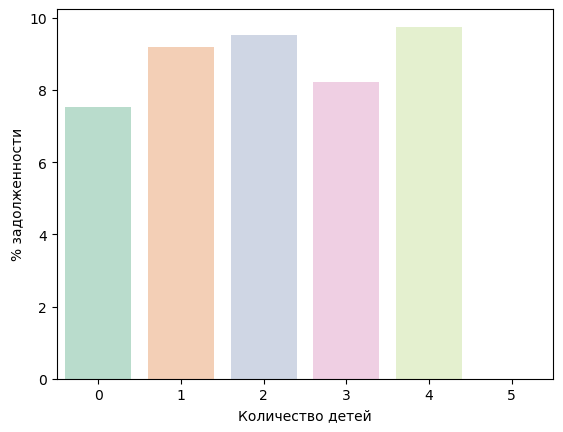

In [49]:
sns.barplot(x='children',y='percent', data = children_data_pivot, palette='Pastel2')
plt.xlabel('Количество детей')
plt.ylabel('% задолженности')
plt.show()

### Вывод 1:

Как ни странно, ни одного случая просрочки по кредиту нет у заёмщиков, имеющих пятерых детей.   
Но это частный случай, ведь такое количество детей - редкость.    
Наименьший процент просрочки - у  бездетных заёмщиков (7,52%), в других группах эта доля выше на 1-2%.

### Вопрос 2:

* Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [56]:
df_family

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [50]:
# сформируем сводную таблицу и добавим дополнительный столбец с % случаев просрочки относительно всех заёмщиков
# в данной категории
# добавим словесную расшифровку ID статуса из ранее созданного словаря

family_data_pivot = df.pivot_table(index=['family_status_id'], columns='debt', values='purpose_category', aggfunc='count')
family_data_pivot['percent'] = (family_data_pivot[1] / (family_data_pivot[1] + family_data_pivot[0])) *100
family_data_pivot = family_data_pivot.merge(df_family, on='family_status_id', how='left')
family_data_pivot.sort_values('percent')

,family_status_id,0,1,percent,family_status
2,2,888,62,6.526316,вдовец / вдова
3,3,1099,84,7.100592,в разводе
0,0,11323,924,7.544705,женат / замужем
1,1,3746,383,9.275854,гражданский брак
4,4,2513,272,9.766607,не женат / не замужем


Сводная таблица показывает зависимость возникновении просрочки по займу в зависимости от семейного положения.   

Процент просрочки, который рассчитан от общего количества заёмщиков в каждой из категорий, ниже у людей, которые оформляли свои отношения официально. 

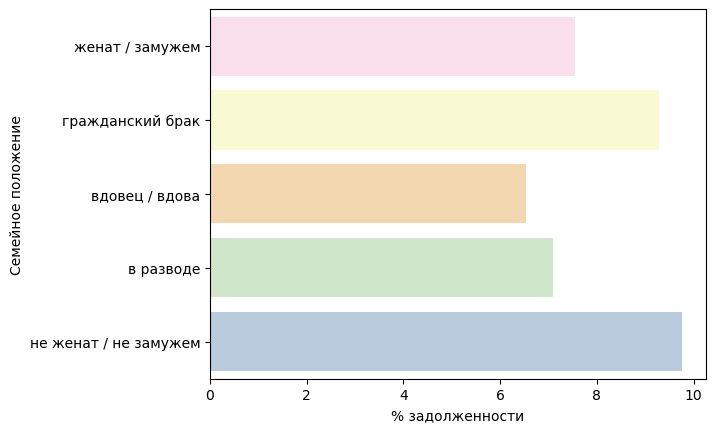

In [51]:
# строим диаграмму

sns.barplot(y='family_status',x='percent',data = family_data_pivot, palette='Pastel1_r')
plt.xlabel('% задолженности')
plt.ylabel('Семейное положение')
plt.show()    

### Вывод 2:

Наиболее доброcовестными заёмщиками являются люди, имевшие опыт семейных отношений, оформленных официально (вне зависимости от того, закончились эти отношения по каким-то причинам или нет). Количество клиентов, которые не имели такого опыта, и которые имеют задолженность по кредиту - выше на 2-3%.

### Вопрос 3:

* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [52]:
# сформируем сводную таблицу и добавим дополнительный столбец с % случаев просрочки относительно всех заёмщиков
# в данной категории

income_data_pivot = df.pivot_table(index=['total_income_category'], columns='debt', values='gender', aggfunc='count')
income_data_pivot['percent'] = (income_data_pivot[1] / (income_data_pivot[1] + income_data_pivot[0])) *100
income_data_pivot = income_data_pivot.reset_index()    # сбросим мультииндексы в сводной таблице
income_data_pivot.sort_values('percent')

debt,total_income_category,0,1,percent
3,D,327,21,6.034483
1,B,4641,353,7.068482
0,A,23,2,8.000000
2,C,14558,1347,8.469035
4,E,20,2,9.090909


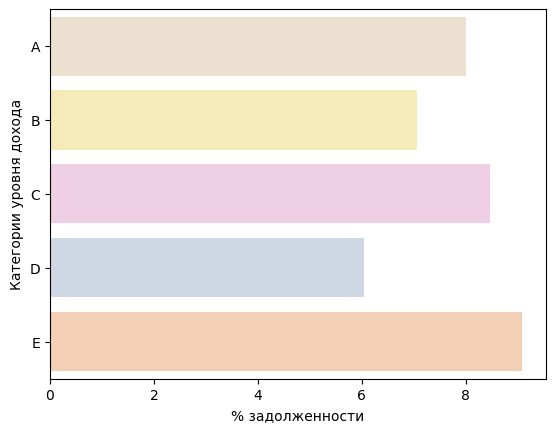

In [53]:
# строим диаграмму

sns.barplot(y='total_income_category',x='percent',data = income_data_pivot, palette='Pastel2_r')
plt.xlabel('% задолженности')
plt.ylabel('Категории уровня дохода')
plt.show()

### Вывод 3:

Как видно из таблицы и диаграммы выше, заёмщики с уровнем дохода 30 001 - 50 000 рублей в первую очередь стараются погасить кредит согласно расписанию. Процент просрочки по ним самый низкий: всего 6%.

Далее идут люди с доходом выше среднего  и высоким доходом (от 200 001 рублей и выше).

Самыми неисполнительными заёмщиками являются лица с самым низким уровнем дохода (менее 30 000 рублей.)

### Вопрос 4:

* Как разные цели кредита влияют на его возврат в срок?

In [54]:
# сформируем сводную таблицу и добавим дополнительный столбец с % случаев просрочки относительно всех заёмщиков
# относительно своей категории

purpose_data_pivot = df.pivot_table(index=['purpose_category'], columns='debt', values='gender', aggfunc='count')
purpose_data_pivot['percent'] = (purpose_data_pivot[1] / (purpose_data_pivot[1] + purpose_data_pivot[0])) *100
purpose_data_pivot = purpose_data_pivot.reset_index()    # сбросим мультииндексы в сводной таблице
purpose_data_pivot.sort_values('percent')

debt,purpose_category,0,1,percent
1,операции с недвижимостью,9953,777,7.241379
3,проведение свадьбы,2131,181,7.828720
2,получение образования,3612,369,9.269028
0,операции с автомобилем,3873,398,9.318661


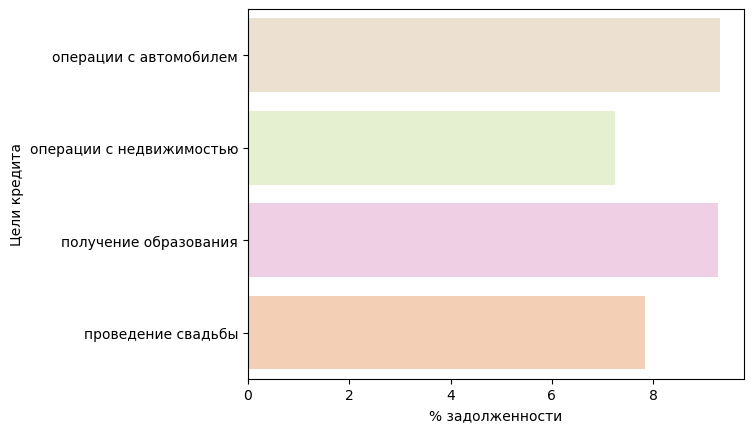

In [55]:
# строим диаграмму

sns.barplot(y='purpose_category',x='percent',data = purpose_data_pivot, palette='Pastel2_r')
plt.xlabel('% задолженности')
plt.ylabel('Цели кредита')
plt.show()    

### Вывод 4:

Самыми проблемными, с точки зрения возврата, являются кредиты на покупку автомобиля.

Кредиты на операции с недвижимостью и на получение образования берут самые добропорядочные заёмщики.

## Общий вывод


* лица без детей, с средним или выше среднего доходом, берущие кредит с целью улучшения жилищных условий или на другие операции с недвижимостью, являются наиболее надежной частью заёмщиков;    


* лица, не состоящие в официальном браке, но имеющими 2-х и более детей, с средним и низким доходом, желающие потратить заёмные средства на покупку автомобиля,  наиболее склонны к нарушению договорных обязательств и погашению кредита в срок.

